In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
data = pd.DataFrame({
    "x" : [1, 2, 3, 4, 5],
    "y" : [2, 4, 5, 4, 5],
    "z" : [3, 5, 7, 8, 9]
})
data

,x,y,z
0,1,2,3
1,2,4,5
2,3,5,7
3,4,4,8
4,5,5,9


# Initial Data Visualization

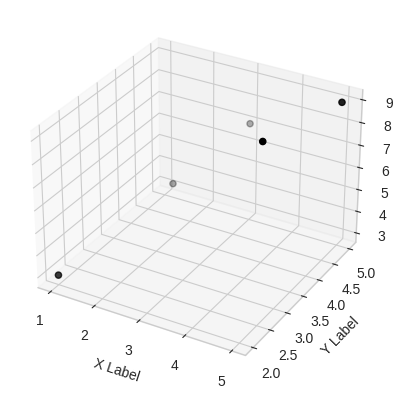

In [3]:
def first_graph():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(data['x'], data['y'], data['z'], c='black', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # ax.view_init(45, -90)
    plt.show()
first_graph()

# Visualization of centered data

In [4]:
centered_data = data - data.mean()
centered_data

,x,y,z
0,-2.0,-2.0,-3.4
1,-1.0,0.0,-1.4
2,0.0,1.0,0.6
3,1.0,0.0,1.6
4,2.0,1.0,2.6


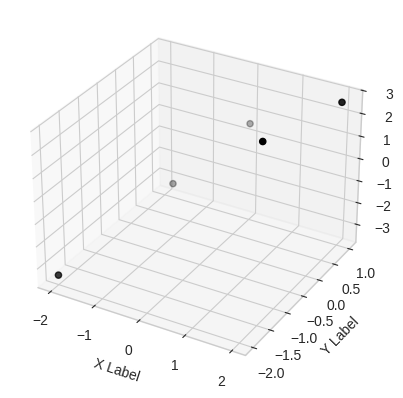

In [5]:
def first_graph():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(centered_data['x'], centered_data['y'], centered_data['z'], c='black', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # ax.view_init(45, -90)
    plt.show()
first_graph()

# Creating a covariance matrix

In [6]:
cov_matrix = np.cov(centered_data, rowvar=False)
cov_matrix

array([[2.5 , 1.5 , 3.75],
       [1.5 , 1.5 , 2.5 ],
       [3.75, 2.5 , 5.8 ]])

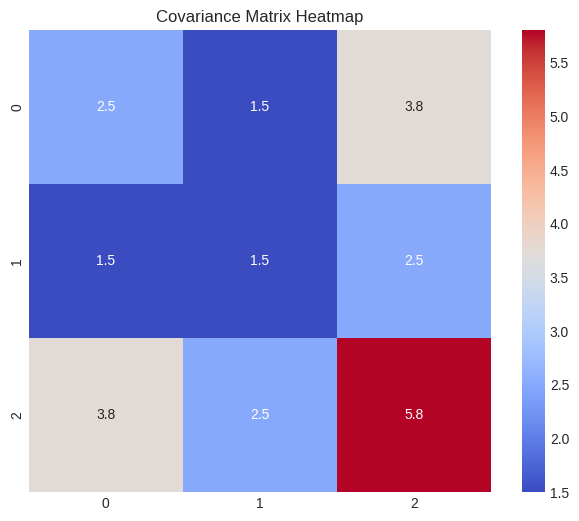

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Covariance Matrix Heatmap")
plt.show()

# Eigenvalues, Eigenvectors

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"The eigenvalues is \n{eigenvalues}")
print(f"The eigenvectors is \n{eigenvectors}")

The eigenvalues is 
[9.33101419 0.02568638 0.44329943]
The eigenvectors is 
[[-0.50869846 -0.76313914  0.39855305]
 [-0.34873291 -0.24060382 -0.90581188]
 [-0.78715388  0.59977368  0.14373694]]


In [9]:
sorted_indices = np.argsort(eigenvalues)[::-1]  # իջեցման կարգով
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]
print(f"The sorted eigenvalues is \n{eigenvalues}")
print(f"The sorted eigenvectors is \n{eigenvectors}")

The sorted eigenvalues is 
[9.33101419 0.44329943 0.02568638]
The sorted eigenvectors is 
[[-0.50869846  0.39855305 -0.76313914]
 [-0.34873291 -0.90581188 -0.24060382]
 [-0.78715388  0.14373694  0.59977368]]


In [10]:
W = eigenvectors[:, :2]
W

array([[-0.50869846,  0.39855305],
       [-0.34873291, -0.90581188],
       [-0.78715388,  0.14373694]])

In [11]:
X_projected = centered_data @ W
X_projected.columns = ["x", "y"]
X_projected

,x,y
0,4.391186,0.525812
1,1.610714,-0.599785
2,-0.821025,-0.819570
3,-1.768145,0.628532
4,-3.412730,0.265010


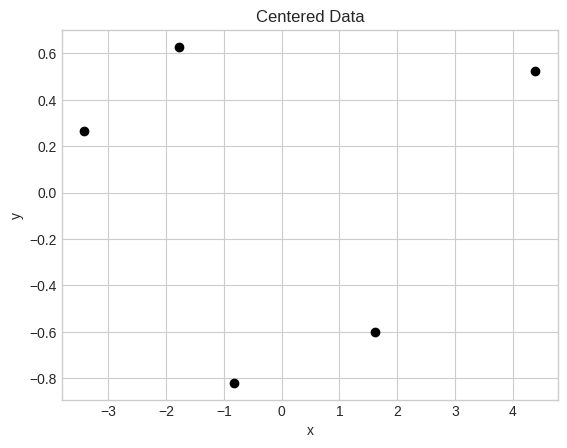

In [12]:
def final_projection():
    plt.scatter(X_projected["x"], X_projected["y"], color = "black")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Centered Data")
    plt.show()
final_projection()

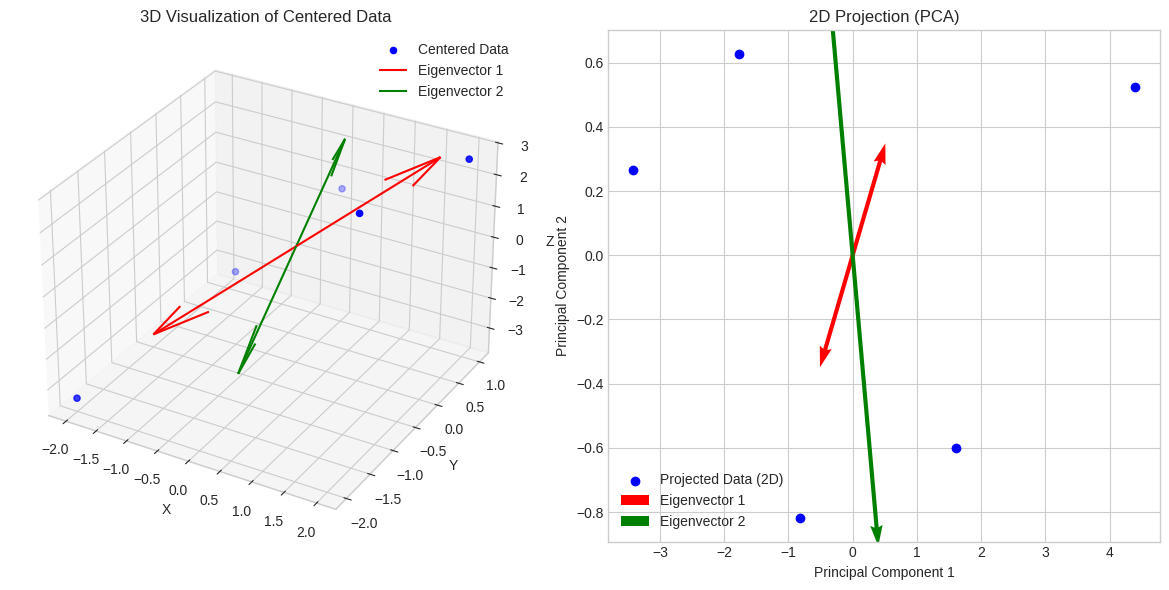

In [13]:
# 3D Visualization of Centered Data with Eigenvectors
fig = plt.figure(figsize=(12, 6))

# Կենտրոնացված տվյալների գրաֆիկ
ax = fig.add_subplot(121, projection='3d')
ax.scatter(centered_data['x'], centered_data['y'], centered_data['z'], color='b', label="Centered Data")
ax.set_title("3D Visualization of Centered Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Պատկերում ենք eigenvector-ները 3D գրաֆիկում երկկողմանի՝ ընդգրկելով բոլոր կետերը
for i in range(2):  # միայն առաջին երկու eigenvector-ները
    ax.quiver(0, 0, 0, eigenvectors[0, i], eigenvectors[1, i], eigenvectors[2, i],
              length=3, color='r' if i == 0 else 'g', label=f"Eigenvector {i+1}")
    ax.quiver(0, 0, 0, -eigenvectors[0, i], -eigenvectors[1, i], -eigenvectors[2, i],
              length=3, color='r' if i == 0 else 'g')

# 2D Visualization of Projected Data with Eigenvectors
ax2 = fig.add_subplot(122)
ax2.scatter(X_projected['x'], X_projected['y'], color='b', label="Projected Data (2D)")


ax2.set_title("2D Projection (PCA)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

# Պատկերում ենք eigenvector-ները 2D գրաֆիկում երկկողմանի՝ ընդգրկելով բոլոր կետերը
for i, color in zip([0, 1], ['r', 'g']):
    ax2.quiver(0, 0, W[0, i], W[1, i], angles='xy', scale_units='xy', scale=1, color=color,
               label=f"Eigenvector {i+1}")
    ax2.quiver(0, 0, -W[0, i], -W[1, i], angles='xy', scale_units='xy', scale=1, color=color)

# Լեգենդներ
ax.legend()
ax2.legend()

plt.tight_layout()
plt.show()


In [14]:
# 1. Էյգենարժեքների ընդհանուր գումար
total_variance = np.sum(eigenvalues)

# 2. Ընտրած կոմպոնենտների (օրինակ՝ առաջին երկու կոմպոնենտների) ընդհանուր գումար
explained_variance = np.sum(eigenvalues[:2])  # Փոխարինել `2`-ը ուրիշ թիվով՝ եթե ցանկանում եք շատ կոմպոնենտներ ընտրել

# 3. Տեղեկատվության կորուստը
information_loss = 1 - (explained_variance / total_variance)

# Տպում ենք արդյունքները
print(f"Total variance: {total_variance}")
print(f"Explained variance (by selected components): {explained_variance}")
print(f"Information loss: {information_loss * 100:.2f}%")

Total variance: 9.8
Explained variance (by selected components): 9.774313619155471
Information loss: 0.26%


# Check the answer with the library

In [15]:
pca = PCA(n_components=1)
X_projected_lib = pca.fit_transform(centered_data)

print("Projected Data using Library PCA:\n", X_projected_lib)
print("Eigenvalues (explained variance) using Library PCA:\n", pca.explained_variance_)
print("Eigenvectors (components) using Library PCA:\n", pca.components_)

Projected Data using Library PCA:
 [[-4.39118594]
 [-1.61071389]
 [ 0.82102524]
 [ 1.76814467]
 [ 3.41272992]]
Eigenvalues (explained variance) using Library PCA:
 [9.33101419]
Eigenvectors (components) using Library PCA:
 [[0.50869846 0.34873291 0.78715388]]
